#  ID3 (Iterative Dichotomiser 3)

### Importing libraries 

In [4]:
import pandas as pd
from sklearn import tree

### Loading Datasets

In [5]:
df = pd.read_csv("data-1.csv")
df.head(5)

,feature_1,feature_2,feature_3,target_attribute
0,0,0,0,0
1,0,0,1,0
2,0,1,0,1
3,0,1,1,1
4,1,0,0,0


### Split the dataset into features and target variables

In [6]:
features = df.drop("target_attribute", axis=1)
target = df["target_attribute"]

### Train the ID3 model

In [7]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(features, target)

### Predict on new data

In [8]:
new_data = [[1, 0, 1]]
print("Prediction:", clf.predict(new_data))

Prediction: [1]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# CART (Classification and Regression Trees)

### Importing libraries 

In [9]:
import pandas as pd
from sklearn import tree

### Load the dataset

In [10]:
df = pd.read_csv("data-2.csv")
df.head(5)

,feature_1,feature_2,feature_3,target_attribute
0,0,0,0,0
1,0,0,1,0
2,0,1,0,1
3,0,1,1,1
4,1,0,0,0


### Split the dataset into features and target variables

In [11]:
features = df.drop("target_attribute", axis=1)
target = df["target_attribute"]

### Train the CART model

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)

### Predict on new data

In [13]:
new_data = [[1, 0, 1]]
print("Prediction:", clf.predict(new_data))

Prediction: [1]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# KNN (K-Nearest Neighbors) implemented from scratch

### Importing libraries 

In [19]:
import csv
import math
import matplotlib.pyplot as plt

### Creating Necessary Functions for KNN

In [20]:
def euclidean_distance(x1, x2, y1, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def knn(k, train_data, test_data):
    distances = []
    for i in range(len(train_data)):
        dist = euclidean_distance(test_data[0], train_data[i][0], test_data[1], train_data[i][1])
        distances.append((train_data[i], dist))
    distances.sort(key = lambda x: x[1])
    neighbors = [d[0][2] for d in distances[:k]]
    return max(set(neighbors), key = neighbors.count)

def load_csv(filename):
    lines = csv.reader(open(filename, "r"))
    next(lines) # Skip the first row (header)
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

### Dataset of KNN

In [22]:
import pandas as pd
data = pd.read_csv("data-3.csv")
data.head()

,feature_1,feature_2,target_attribute
0,2,2,0
1,2,4,0
2,4,2,0
3,4,4,0
4,6,6,1


### Plotting, Training and Testing 

Result:  1.0


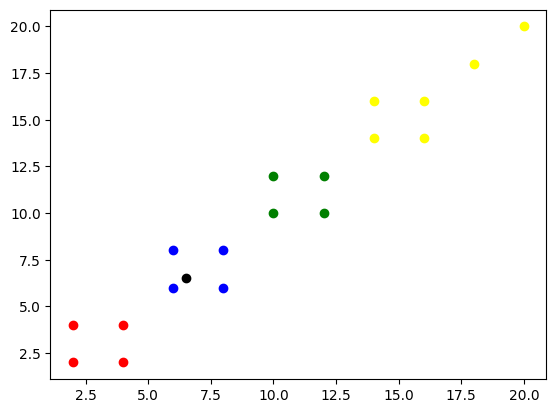

In [21]:
train_data = load_csv('data-3.csv')
test_data = [6.5, 6.5]
k = 5
result = knn(k, train_data, test_data)
print("Result: ", result)

# Plotting the data and decision boundaries
colors = ['red', 'blue', 'green', 'yellow']
for i in range(len(train_data)):
    plt.scatter(train_data[i][0], train_data[i][1], color = colors[int(train_data[i][2])])
plt.scatter(test_data[0], test_data[1], color = 'black')
plt.show()

#  KNN implementation in Python using the scikit-learn library

### Importing libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Load the iris dataset

In [33]:
iris = datasets.load_iris()
iris["data"][0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Create a dataframe with the features and target

In [34]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split the data into training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2)

### KNN model to the training data, Predict and Calculate accuracy

In [36]:
# Fit the KNN model to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

### Plot the predictions

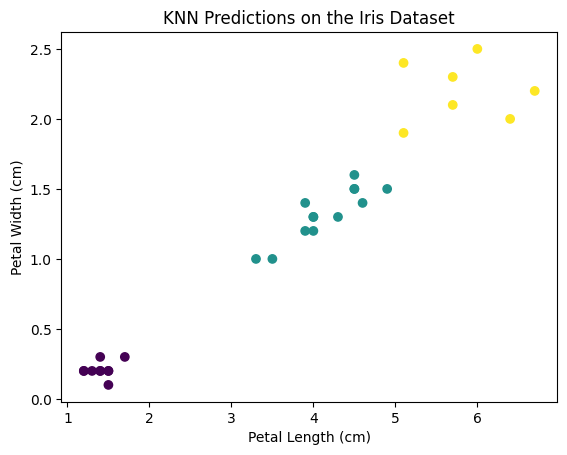

Accuracy: 100.0


In [37]:
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_pred, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KNN Predictions on the Iris Dataset')
plt.show()

print("Accuracy:", accuracy*100)


# Naive Bayes 

###  Importing and Loading dataset

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()

# Convert the dataset to a Pandas dataframe
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["class"] = iris.target

# Split the data into features and target
X = data.drop("class", axis=1)
y = data["class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train a Gaussian Naive Bayes classifier

In [45]:
# Train a Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9666666666666667


### Plot the confusion matrix

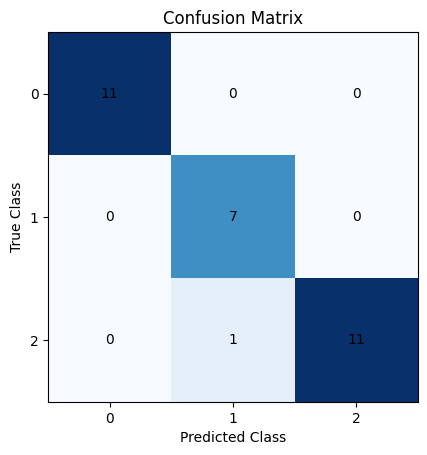

In [46]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.title("Confusion Matrix")
plt.show()
